# Data Wrangling

In [117]:
import pandas as pd

In [118]:
import numpy as np

In [119]:
pd.read_csv("python_assignment_1.csv")

,participant,prime,target,rt
0,1,positiveprime,positivetarget,1502
1,2,positiveprime,positivetarget,1535
2,3,positiveprime,positivetarget,1563
3,4,positiveprime,positivetarget,1492
4,5,positiveprime,positivetarget,1560
...,...,...,...,...
587,144,negativeprime,negativetarget,1474
588,145,negativeprime,negativetarget,1535
589,146,negativeprime,negativetarget,1575
590,147,negativeprime,negativetarget,1505


In [120]:
def read_my_data(x):
    my_data = pd.read_csv(x)
    return my_data

In [121]:
my_data=read_my_data("python_assignment_1.csv")

In [122]:
my_data.head()

,participant,prime,target,rt
0,1,positiveprime,positivetarget,1502
1,2,positiveprime,positivetarget,1535
2,3,positiveprime,positivetarget,1563
3,4,positiveprime,positivetarget,1492
4,5,positiveprime,positivetarget,1560


In [123]:
my_data.columns = my_data.columns.str.title()

In [124]:
my_data = my_data.replace(['positiveprime', 'negativeprime', 'positivetarget', 'negativetarget'], 
                ['Positive', 'Negative', 'Positive', 'Negative'])

In [125]:
my_data.head()

,Participant,Prime,Target,Rt
0,1,Positive,Positive,1502
1,2,Positive,Positive,1535
2,3,Positive,Positive,1563
3,4,Positive,Positive,1492
4,5,Positive,Positive,1560


# Descriptive Statistics

In [126]:
grouped_data = my_data.groupby(['Prime', 'Target'])
descr = grouped_data['Rt'].aggregate([np.median, np.std, np.mean]).reset_index()
descr.columns = descr.columns.str.title()
descr

,Prime,Target,Median,Std,Mean
0,Negative,Negative,1550.5,52.382700,1547.256757
1,Negative,Positive,1562.0,50.468400,1562.648649
2,Positive,Negative,1570.5,54.016737,1566.959459
3,Positive,Positive,1550.5,44.879072,1547.391892


## Data Visualisation

In [127]:
import matplotlib as mpl 

In [143]:
from statsmodels.graphics.factorplots import interaction_plot

In [128]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, '')

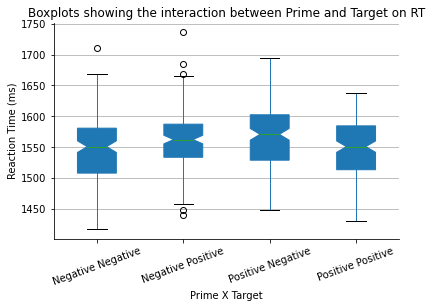

In [151]:
bp = my_data.boxplot(column='Rt', by=['Prime', 'Target'],
                     notch=True, patch_artist=True)

for x in [bp]:
    plt.grid(visible=None)
    bp.yaxis.grid(True)
    bp.set_xlabel('Prime X Target')
    bp.set_ylabel('Reaction Time (ms)')
    plt.title('Boxplots showing the interaction between Prime and Target on RT')
    bp.spines['top'].set_visible(False)
    bp.spines['right'].set_visible(False)
    plt.xticks(rotation=20)
    bp.set_xticklabels(['Negative Negative', 'Negative Positive','Positive Negative', 'Positive Positive'])

bp.get_figure().suptitle('')

## Interaction Plot

In [155]:
group_means = grouped_data.mean()
data_to_plot = pd.DataFrame(group_means).reset_index()

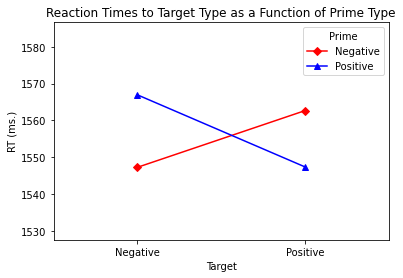

In [154]:
ip = interaction_plot(x=data_to_plot['Target'], trace=data_to_plot['Prime'], 
                                       response=data_to_plot['Rt'], colors=['red', 'blue'], 
                                       markers=['D', '^'])
plt.xlabel('Target')
plt.ylabel('RT (ms.)')
plt.title('Reaction Times to Target Type as a Function of Prime Type')
plt.margins(.5, 1)

# Anova

In [131]:
from scipy import stats

In [132]:
from statsmodels.stats.anova import AnovaRM
factorial_model = AnovaRM(data=my_data, depvar='Rt', within=['Prime', 'Target'], subject='Participant').fit()
print(factorial_model)

                   Anova
             F Value Num DF  Den DF  Pr > F
-------------------------------------------
Prime         0.3132 1.0000 147.0000 0.5766
Target        0.2365 1.0000 147.0000 0.6275
Prime:Target 17.1778 1.0000 147.0000 0.0001



# Post hoc testing

In [133]:
index = (my_data['Prime']=='Positive') & (my_data['Target']=='Positive')
PP = my_data[index]['Rt']

In [134]:
index = (my_data['Prime']=='Negative') & (my_data['Target']=='Positive')
NP = my_data[index]['Rt']

In [135]:
stats.ttest_rel(PP, NP)

Ttest_relResult(statistic=-2.906391854871503, pvalue=0.00422249196356647)

In [136]:
index = (my_data['Prime']=='Positive') & (my_data['Target']=='Negative')
PN = my_data[index]['Rt']
index = (my_data['Prime']=='Negative') & (my_data['Target']=='Negative')
NN = my_data[index]['Rt']

In [29]:
stats.ttest_rel(PN, NN)

Ttest_relResult(statistic=3.1321734668224033, pvalue=0.0020943602880594543)